Author @Tonghong Chen

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# Data Preparation

In [38]:
df = sns.load_dataset('iris')
X = df.iloc[:, :-1]
y = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### create training and testing datasets

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

D:\OS_App\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


##### standardize the training data

In [41]:
from sklearn.preprocessing import StandardScaler
X_std_train = StandardScaler().fit_transform(X_train)
X_std_test = StandardScaler().fit_transform(X_test)

# Classifier

## Logistics Regression

##### Basic

The SGDClassifier in sklearn package is optimized on finding local minima, and thus usually performs pretty bad on the iris data

In [71]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', penalty='elasticnet', 
                    alpha=0.0001, l1_ratio=0.15, max_iter=1000, tol=1e-3)
clf.fit(X_std_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [73]:
clf.score(X_std_test, y_test)

0.96666666666666667

##### Auto-Selected

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga',multi_class='multinomial', penalty='l2',
                         tol = 1e-03, max_iter=1000)
clf.fit(X_std_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.001, verbose=0, warm_start=False)

##### With Cross Validation

In [8]:
from sklearn.linear_model import LogisticRegressionCV
Cs = np.exp(np.linspace(-5, 8, 20))
nfold = 5
clf = LogisticRegressionCV(Cs=Cs,cv=nfold, penalty="l1", solver='saga', multi_class="multinomial", 
                            scoring="neg_log_loss", refit=True)
clf.fit(X_std_train, y_train)

D:\OS_App\anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegressionCV(Cs=array([  6.73795e-03,   1.33560e-02,   2.64743e-02,   5.24776e-02,
         1.04021e-01,   2.06192e-01,   4.08715e-01,   8.10158e-01,
         1.60590e+00,   3.18322e+00,   6.30981e+00,   1.25073e+01,
         2.47921e+01,   4.91431e+01,   9.74118e+01,   1.93090e+02,
         3.82745e+02,   7.58679e+02,   1.50386e+03,   2.98096e+03]),
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l1', random_state=None, refit=True,
           scoring='neg_log_loss', solver='saga', tol=0.0001, verbose=0)

## LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_std_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=2) # a small n_neighbors may result in overfitting
clf.fit(X_std_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

## SVM

In [11]:
from sklearn import svm

#### Linear SVM

In [12]:
clf = svm.SVC(kernel='linear', C=1, verbose=True)  # Higher C <=> fewer margin violations but ends up with a smaller margin
clf.fit(X_std_train, y_train)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

#### Kernel SVM

In [13]:
clf = svm.SVC(kernel='poly', degree=3, C=1) # degree: only valid for the polynomial kernel function
clf = svm.SVC(kernel='rbf', C=1) 
clf.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Decision Tree

In [14]:
from sklearn import tree
import graphviz

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
clf.fit(X_std_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

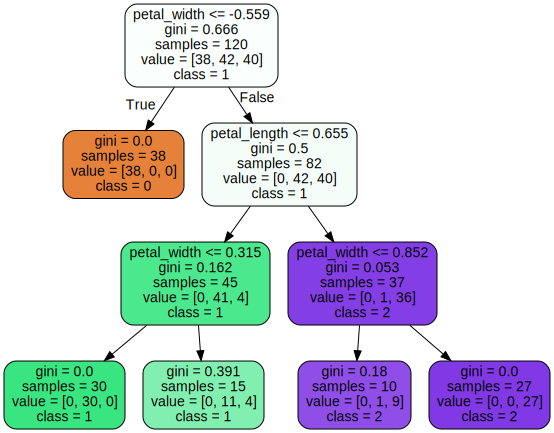

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns,
                                class_names=y.unique().astype('str'), rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

## Bagging (with Decision Tree)

Bagging methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier().fit(X_std_train, y_train), 
                            oob_score=True, n_estimators=1000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_std_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [21]:
bag_clf.oob_score_

0.95833333333333337

## Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_std_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Extra-Trees (Extremely Randomized Trees)

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(X_std_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## AdaBoost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [30]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())
clf.fit(X_std_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

## Gradient Boost

Sequentially adding predictors, and fit the new predictor by the residual errors of its predictor

**Step 1. **

  $$Y = F(x) + \epsilon$$

**Step 2. **

  $$\epsilon = G(x) + \epsilon_2$$

  Substituting (2) into (1), we get:
  
  $$Y = F(x) + G(x) + \epsilon_2$$
    
**Step 3. **

  $$\epsilon_2 = H(x)  + \epsilon_3$$

Now:
  
  $$Y = F(x) + G(x) + H(x)  + \epsilon_3$$
  
Finally, adding weights of each predictor  
  
  $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_std_train, y_train)

## Xgboost (Regularized Gradient Boost)

[Documentation](http://xgboost.readthedocs.io/en/latest/)

[tqchen github](https://github.com/tqchen/xgboost/tree/master/demo/guide-python)

[dmlc github](https://github.com/dmlc/xgboost)

In [34]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)
clf.fit(X_std_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Neural Network

In [141]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [163]:
# Convert class vectors to binary class matrices.
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=3)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=3)

In [189]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [195]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

model.fit(X_std_train, y_train_categorical,
          batch_size=10,
          epochs=10, 
          validation_data=(X_std_test, y_test_categorical))

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 1s 8ms/step - loss: 0.5605 - acc: 0.7583 - val_loss: 0.5228 - val_acc: 0.7667
Epoch 2/10
120/120 [==============================] - 0s 727us/step - loss: 0.5415 - acc: 0.7500 - val_loss: 0.5178 - val_acc: 0.7667
Epoch 3/10
120/120 [==============================] - 0s 740us/step - loss: 0.5449 - acc: 0.7583 - val_loss: 0.5129 - val_acc: 0.7667
Epoch 4/10
120/120 [==============================] - 0s 791us/step - loss: 0.5305 - acc: 0.7583 - val_loss: 0.5082 - val_acc: 0.7667
Epoch 5/10
120/120 [==============================] - 0s 785us/step - loss: 0.5117 - acc: 0.7917 - val_loss: 0.5038 - val_acc: 0.7667
Epoch 6/10
120/120 [==============================] - 0s 723us/step - loss: 0.5236 - acc: 0.7917 - val_loss: 0.4997 - val_acc: 0.7667
Epoch 7/10
120/120 [==============================] - 0s 723us/step - loss: 0.5102 - acc: 0.7917 - val_loss: 0.4952 - val_acc: 0.7667
Epoch 8/10
120/120 

##### prediction accuracy of the fitted model

In [ ]:
score = model.evaluate(X_std_test, y_test_categorical, verbose=True)
print('Test score:', score[0])
print('Test accuracy:', score[1])

****

<b><font size = 5 color = 'purple'> CNN (with MNIST dataset)

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, MaxPooling2D, Dropout, Input, Lambda, Flatten
from keras.preprocessing.image import ImageDataGenerator
# import keras.backend as K
# from keras.callbacks import TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [2]:
# Read data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
def model_cnn(IMG_WIDTH=28, IMG_HEIGHT=28, CHANNEL=1):
    
    inputs = Input((IMG_WIDTH, IMG_HEIGHT, CHANNEL))
    norm_input = Lambda(lambda x: x/255)(inputs)
  
    c1 = Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu')(norm_input)
    c2 = Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu')(c1)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.25)(p2)
   
    c3 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(p2)
    c4 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(c3)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(0.25)(p4)
  
    f = Flatten()(p4)
    d1 = Dense(256, activation='relu')(f)
    d1 = Dropout(0.5)(d1)
  
    outputs = Dense(10, activation='softmax')(d1)
  
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [5]:
cnnmodel = model_cnn()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [ ]:
# Define a image generator
imageGenerator = ImageDataGenerator(featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [ ]:
# fit the CNN model with image generator
cnnmodel.fit_generator(imageGenerator.fit(x_train).flow(x_train, y_train, batch_size=128),
                     epochs=20, validation_data=(x_test, y_test))

In [ ]:
# evaluate the CNN model 
cnnmodel.evaluate(x_test, y_test)

****

# Parameter Tuning

### Grid Search

In [9]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 

In [10]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

# this are the parameters that we want the grid search to scan through
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} # the format is: 'clf_' + parameter

# use grid search cross-validation to fin the best parameters
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    8.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [11]:
svm_grid_rbf.best_score_

0.97499999999999998

In [12]:
svm_grid_rbf.best_estimator_.get_params() 

{'clf': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.75, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 1,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 0.75,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False,
 'memory': None,
 'steps': [('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.75, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))]}

# Metrics for Classification

### Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')

array([ 0.84615385,  1.        ,  0.75      ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.91666667,  1.        ,  1.        ])

### Accuracy Score

In [36]:
from sklearn.metrics import accuracy_score
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_std_test))))

accuracy score: 0.9667



### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_std_test))))    

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  2]
 [ 0  0  9]]



### Percision, Recall and F-1 Score

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, clf.predict(X_std_test), average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, clf.predict(X_std_test), average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, clf.predict(X_std_test), average='weighted')))

Precision Score: 	 0.9455
Recall Score: 		 0.9333
F1 Score: 		 0.9333


### Classification Report

In [20]:
from sklearn.metrics import classification_report
print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_std_test))))

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.82      0.90        11
          2       0.82      1.00      0.90         9

avg / total       0.95      0.93      0.93        30


